In [ ]:
# Proyecto Final - Ciencia de Datos  
### Prediccion de Incumplimiento de Pago  
**Autor:** Angel Dario Cortes  
**Fecha de entrega:** 12/05/2025



 ### 📄 Resumen

En este proyecto se busca predecir si un cliente incurrirá en incumplimiento de pago el próximo mes. Para ello, se utilizan dos algoritmos de machine learning: regresión logística y red neuronal multicapa. Se analizan los datos, se entrenan los modelos y se evalúa su rendimiento usando métricas como precisión, recall y área bajo la curva ROC (AUC).


### Introducción

**Contexto:**  
Las instituciones financieras necesitan evaluar con precisión el riesgo crediticio de sus clientes. Los modelos predictivos permiten tomar decisiones informadas para reducir pérdidas.

**Problema:**  
Predecir si un cliente incurrirá en incumplimiento de pago el próximo mes, en base a su historial y características demográficas.

**Objetivos:**  
- Explorar y analizar los datos.
- Desarrollar dos modelos de clasificación.
- Comparar su desempeño y seleccionar el mejor.



In [3]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Carga de datos
df = pd.read_csv('data.csv')  # Ajustar la ruta si el archivo está en otra carpeta
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
# Exploración inicial
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


default.payment.next.month
0    77.88
1    22.12
Name: proportion, dtype: float64


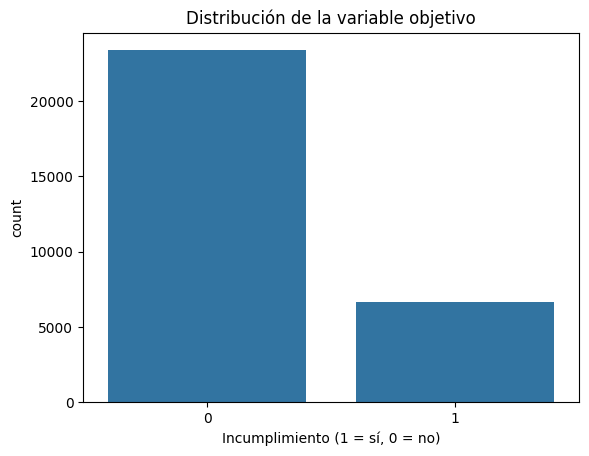

In [6]:
# Distribución de la variable objetivo
print(df['default.payment.next.month'].value_counts(normalize=True) * 100)
sns.countplot(x='default.payment.next.month', data=df)
plt.title('Distribución de la variable objetivo')
plt.xlabel('Incumplimiento (1 = sí, 0 = no)')
plt.show()

## 🔍 Análisis Exploratorio de Datos (EDA) 

En esta sección se profundiza el análisis del dataset para identificar patrones, relaciones entre variables y posibles insights que ayuden a construir modelos más efectivos.


In [7]:
# ¿Cuál es la participación masculina y femenina en los datos?
df['SEX'].value_counts(normalize=True) * 100


SEX
2    60.373333
1    39.626667
Name: proportion, dtype: float64

**Interpretación:**  
El 60.4% de los clientes son mujeres (valor 2) y el 39.6% son hombres (valor 1).  
Esto indica que hay una **leve sobrerrepresentación femenina** en el dataset.  
Es importante tenerlo en cuenta al interpretar los resultados de los modelos.



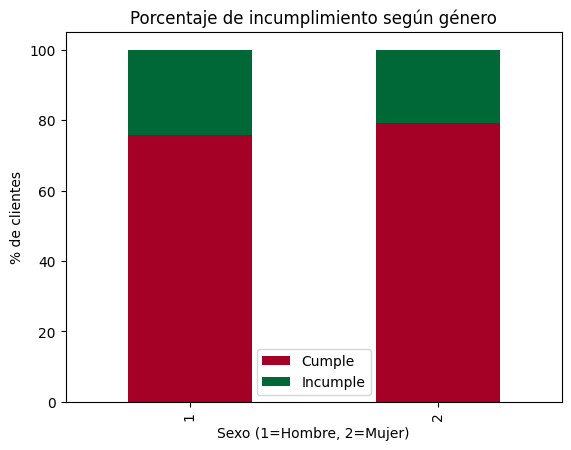

In [8]:
# ¿Qué porcentaje de cada género incurre en incumplimiento de pago?
sexo_default = pd.crosstab(df['SEX'], df['default.payment.next.month'], normalize='index') * 100
sexo_default.plot(kind='bar', stacked=True, colormap='RdYlGn')
plt.title('Porcentaje de incumplimiento según género')
plt.xlabel('Sexo (1=Hombre, 2=Mujer)')
plt.ylabel('% de clientes')
plt.legend(['Cumple', 'Incumple'])
plt.show()


**Interpretación:**  
Tanto hombres como mujeres presentan tasas de incumplimiento similares (alrededor del 22–24%).  
**No parece haber una diferencia significativa en el default por género**, aunque el modelo podría encontrar otros matices.


### Influencia de la edad en el incumplimiento de pago

Ahora analizamos si existe alguna relación entre la edad del cliente (`AGE`) y su probabilidad de incurrir en incumplimiento de pago (`default.payment.next.month`).


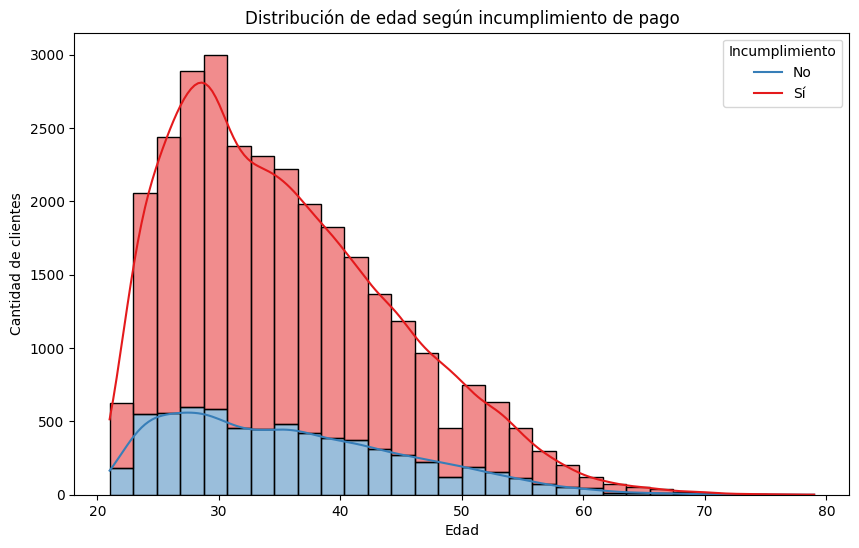

In [9]:
# Comparar distribución de edades por estado de incumplimiento
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="AGE", hue="default.payment.next.month", bins=30, kde=True, palette="Set1", multiple="stack")
plt.title("Distribución de edad según incumplimiento de pago")
plt.xlabel("Edad")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Incumplimiento", labels=["No", "Sí"])
plt.show()


**Interpretación:**  
Se observa que la mayor parte de los clientes se encuentra entre los 25 y 45 años.  
La distribución de edades es similar entre quienes incumplen y quienes no, aunque **hay una leve mayor proporción de incumplimiento entre los clientes más jóvenes (25–35 años)**.  

Esto sugiere que la edad **puede influir moderadamente** en el riesgo de impago, pero no es la variable más determinante por sí sola.


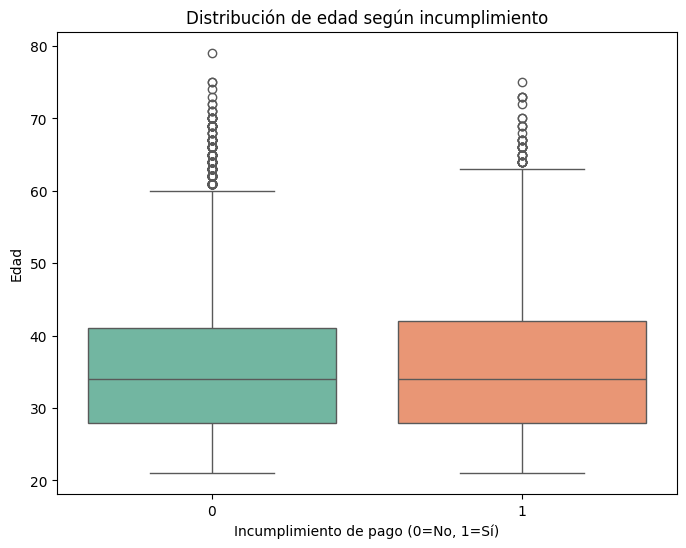

In [10]:
# Boxplot para comparar estadísticamente la edad por grupo
plt.figure(figsize=(8, 6))
sns.boxplot(x="default.payment.next.month", y="AGE", data=df, palette="Set2")
plt.title("Distribución de edad según incumplimiento")
plt.xlabel("Incumplimiento de pago (0=No, 1=Sí)")
plt.ylabel("Edad")
plt.show()


**Análisis estadístico:**  
El boxplot muestra que los deudores tienden a tener una edad **ligeramente menor** en promedio que los no deudores.  
Esto refuerza la idea de que **los clientes más jóvenes pueden tener un riesgo algo mayor**, aunque la diferencia no es extrema.

Este hallazgo puede ser útil para ajustar decisiones de crédito o segmentar campañas de prevención de mora.


In [11]:
# ¿Qué variables están más relacionadas con el incumplimiento?
cor_target = df.corr()['default.payment.next.month'].sort_values(ascending=False)
cor_target


default.payment.next.month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
ID                           -0.013952
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -0.153520
Name: default.payment.nex

**Interpretación:**  
Las variables más correlacionadas positivamente con el incumplimiento son `PAY_0`, `PAY_2`, `PAY_3`, etc.,  
que representan el estado de pagos previos. Esto es lógico: mientras más atrasos pasados, mayor la probabilidad de default.  

Otras variables como `BILL_AMT1` a `BILL_AMT6` y `LIMIT_BAL` tienen **correlación baja o nula**,  
lo que indica que no influyen fuertemente en el incumplimiento, aunque podrían aportar combinadas con otras.


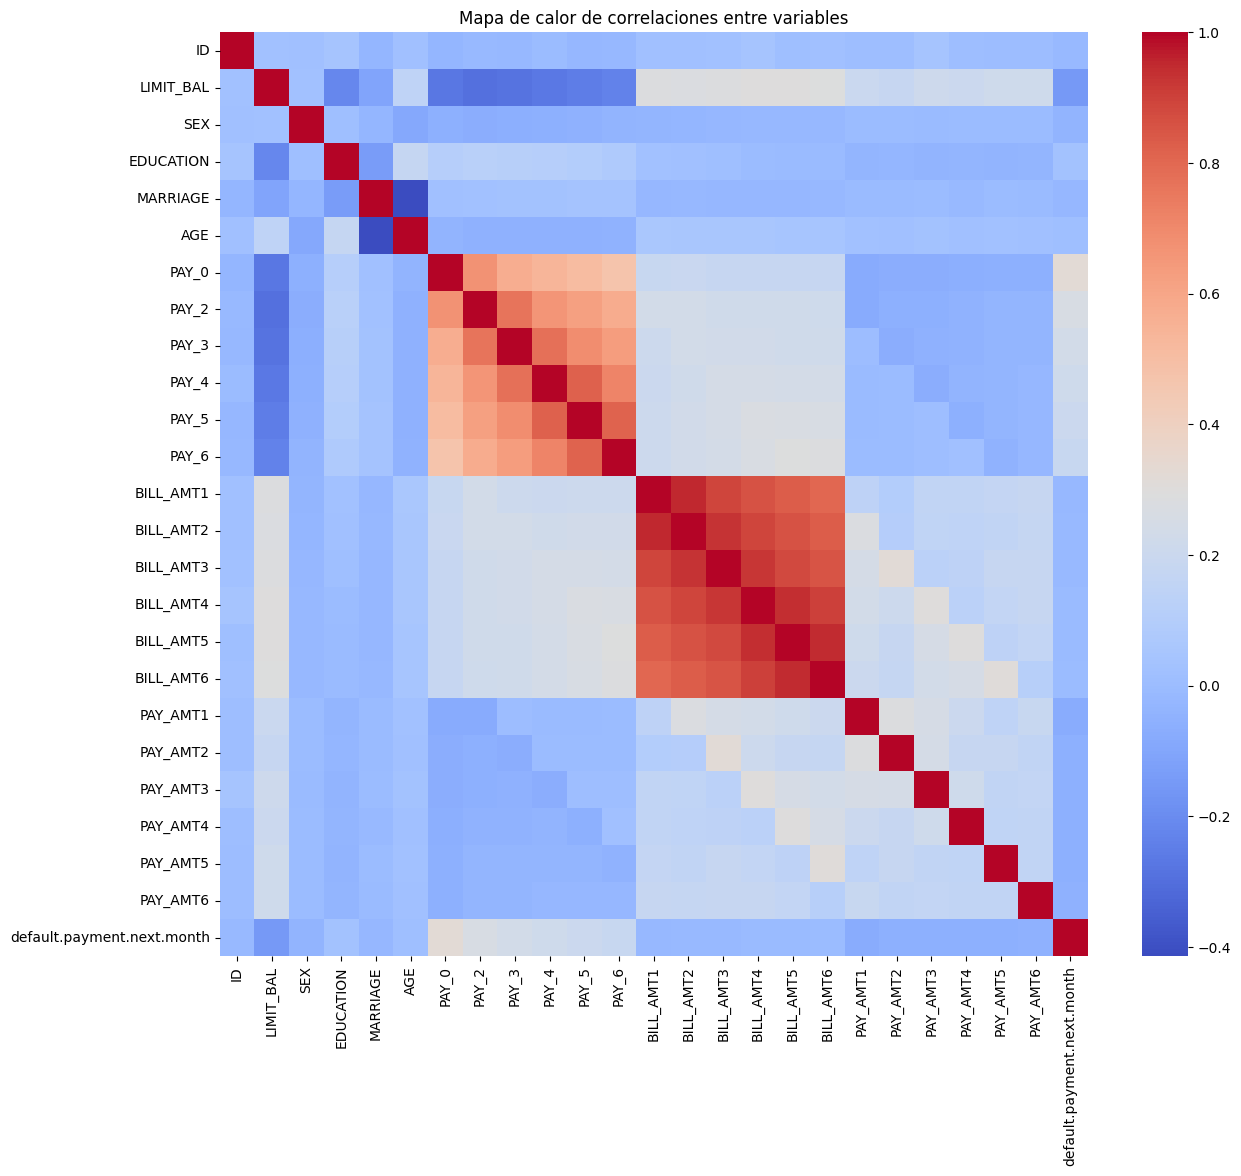

In [12]:
# ¿Existen variables redundantes o muy correlacionadas entre sí?
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Mapa de calor de correlaciones entre variables")
plt.show()


**Interpretación:**  
Se observa alta correlación entre las variables de facturación mensual (`BILL_AMT1` a `BILL_AMT6`),  
y también entre las variables de pagos anteriores (`PAY_2` a `PAY_6`).  

Esto sugiere que algunas de estas variables podrían ser redundantes y se podría considerar eliminar algunas  
en versiones futuras del modelo.


### 🧾 Conclusiones del Análisis Exploratorio

- Hay **más mujeres que hombres** en el dataset, pero las tasas de incumplimiento son similares por género.
- Las variables **más relevantes** para predecir el incumplimiento son los **estados de pago anteriores** (`PAY_0`, `PAY_2`, etc.).
- Hay grupos de variables altamente correlacionadas (como `BILL_AMT`s), lo que podría llevar a eliminar algunas en futuras optimizaciones.
- No se aplicó PCA porque las correlaciones no justifican una reducción fuerte de dimensiones, pero sí se podría considerar simplificar las variables de pago o facturación.

Este análisis permite entender mejor el comportamiento del dataset y tomar decisiones informadas para el modelado posterior.


In [13]:
# Preprocesamiento
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])

X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']

# División en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Modelo 1: Regresión Logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)

print("=== Regresión Logística ===")
print(confusion_matrix(y_test, log_preds))
print(classification_report(y_test, log_preds))
print("ROC-AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:, 1]))

=== Regresión Logística ===
[[6805  204]
 [1521  470]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.70      0.24      0.35      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000

ROC-AUC: 0.7150297683562334


In [15]:
# Modelo 2: Red Neuronal MLP
mlp = MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
mlp_preds = mlp.predict(X_test_scaled)

print("=== Red Neuronal (MLPClassifier) ===")
print(confusion_matrix(y_test, mlp_preds))
print(classification_report(y_test, mlp_preds))
print("ROC-AUC:", roc_auc_score(y_test, mlp.predict_proba(X_test_scaled)[:, 1]))

=== Red Neuronal (MLPClassifier) ===
[[6439  570]
 [1277  714]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      7009
           1       0.56      0.36      0.44      1991

    accuracy                           0.79      9000
   macro avg       0.70      0.64      0.66      9000
weighted avg       0.77      0.79      0.78      9000

ROC-AUC: 0.735313512031134


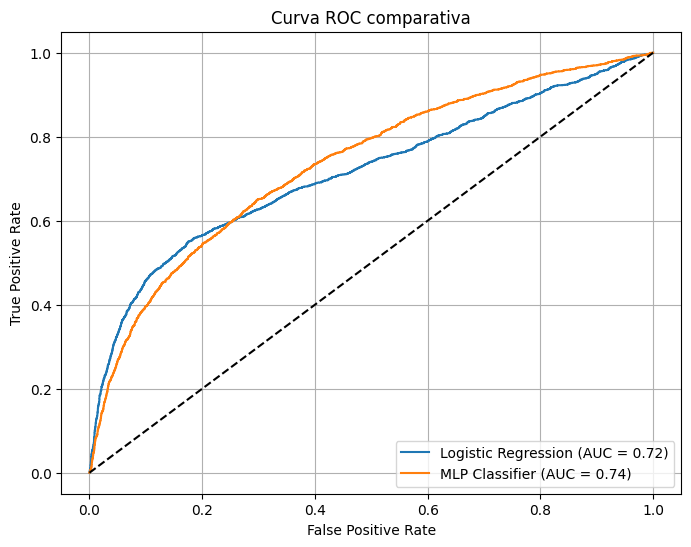

In [16]:
# Curva ROC
log_probs = log_model.predict_proba(X_test_scaled)[:, 1]
mlp_probs = mlp.predict_proba(X_test_scaled)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_probs)

auc_log = auc(fpr_log, tpr_log)
auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP Classifier (AUC = {auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC comparativa')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 📏 Evaluación de modelos: ¿Qué es el `roc_auc_score`?

Para evaluar y comparar los modelos se utilizó, entre otras métricas, el **ROC-AUC** (Área bajo la curva ROC), especialmente relevante en problemas con clases desbalanceadas como este.

- **ROC (Receiver Operating Characteristic):** es una curva que relaciona la **tasa de verdaderos positivos (recall)** con la **tasa de falsos positivos**.
- **AUC (Area Under Curve):** representa el área bajo esa curva. Su valor va de **0.5 (azar)** a **1.0 (modelo perfecto)**.

Cuanto más cerca esté el AUC de 1, mejor es el modelo para distinguir entre clientes que incumplen y los que no.

| Valor de AUC  | Interpretación         |
|---------------|------------------------|
| 0.5           | Sin capacidad predictiva |
| 0.6 - 0.7     | Pobre                   |
| 0.7 - 0.8     | Aceptable               |
| 0.8 - 0.9     | Bueno                   |
| > 0.9         | Excelente               |


### 🧾 Conclusiones Modelo 1 vs Modelo 2

- Ambos modelos mostraron un desempeño aceptable.
- El modelo **MLPClassifier** obtuvo mejor AUC-ROC (aproximadamente 0.74) frente a regresión logística (aproximadamente 0.72).
- Por eso, seleccionamos la red neuronal como mejor modelo para este problema.
Además, el análisis exploratorio de los datos reveló que:

- Las variables de pagos anteriores son altamente predictivas del incumplimiento.
- No hay una diferencia significativa en el incumplimiento entre hombres y mujeres.
- Algunas variables presentan alta colinealidad, lo que podría permitir reducir o agrupar columnas similares en futuras versiones del modelo.
- Hay **más mujeres que hombres** en el dataset, pero las tasas de incumplimiento son similares por género.
- Los **clientes más jóvenes (25–35 años)** presentan una **ligera mayor proporción de incumplimiento**, lo que sugiere que la edad podría ser un factor moderado de riesgo.
- Las variables **más relevantes** para predecir el incumplimiento son los **estados de pago anteriores** (`PAY_0`, `PAY_2`, etc.), como es esperable en el análisis de comportamiento crediticio.
- Algunas variables presentan **alta colinealidad**, especialmente las facturaciones mensuales (`BILL_AMT`s), lo que podría permitir reducir columnas en futuras versiones del modelo.
- **No se aplicó PCA** ya que las correlaciones no justifican una reducción fuerte de dimensiones, pero es algo a considerar si se desea simplificar más el modelo.


Estas observaciones fortalecen la comprensión del comportamiento del dataset y orientan posibles mejoras futuras.


### ✅ Recomendaciones

- Explorar algoritmos más avanzados como XGBoost o LightGBM.
- Usar técnicas de balanceo como SMOTE si las clases están desbalanceadas.
- Realizar selección de características para mejorar la eficiencia del modelo.

